# Radial plot and timeseries of a point through time

In [1]:
from hfradarpy.radials import Radial, concat
import glob
import os
import xarray as xr

In [2]:
# Path to radial directory
radial_dir = '/Users/mikesmith/Documents/work/ugos/new/qc/'
# radial_dir = '/Users/mikesmith/Documents/github/rucool/hfradarpy/hfradarpy/data/radials/ruv/SEAB/'

# Use glob to find radial files (*
files = sorted(glob.glob(os.path.join(radial_dir, '*.ruv')))
files[:10] # List first 10 radials found for brevity

['/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2019_12_29_0000.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2019_12_29_0100.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2019_12_29_0200.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2019_12_29_0300.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2019_12_29_0400.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2019_12_29_0500.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2019_12_29_0600.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2019_12_29_0700.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2019_12_29_0800.ruv',
 '/Users/mikesmith/Documents/work/ugos/new/qc/RDLm_MARA_2019_12_29_0900.ruv']

### Concat takes a list of files and appends them to each other in an xarray dataset


In [3]:
ds = concat(sorted(files), type='gridded', enhance=True)
ds
# ds = xr.open_mfdataset(radial_dir + '*.nc')

/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/xarray/core/alignment.py:307: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)


<xarray.Dataset>
Dimensions:                   (bearing: 72, range: 35, time: 165)
Coordinates:
  * range                     (range) float64 11.65 17.47 23.3 ... 203.9 209.7
  * bearing                   (bearing) int16 2 7 12 17 22 ... 342 347 352 357
  * time                      (time) datetime64[ns] 2019-12-29 ... 2020-01-04...
    lon                       (time, range, bearing) float64 -80.98 ... nan
    lat                       (time, range, bearing) float32 24.8448 ... nan
Data variables:
    u                         (time, range, bearing) float32 nan nan ... nan nan
    v                         (time, range, bearing) float32 nan nan ... nan nan
    vector_flag               (time, range, bearing) float32 nan nan ... nan nan
    spatial_quality           (time, range, bearing) float32 nan nan ... nan nan
    temporal_quality          (time, range, bearing) float32 nan nan ... nan nan
    velocity_max              (time, range, bearing) float32 nan nan ... nan nan
    velocity_min              (time, range, bearing) float32 nan nan ... nan nan
    spatial_count             (time, range, bearing) float32 nan nan ... nan nan
    temporal_count            (time, range, bearing) float32 nan nan ... nan nan
    dist_east_from_origin     (time, range, bearing) float32 nan nan ... nan nan
    dist_north_from_origin    (time, range, bearing) float32 nan nan ... nan nan
    velocity                  (time, range, bearing) float32 nan nan ... nan nan
    heading                   (time, range, bearing) float32 nan nan ... nan nan
    range_cell                (time, range, bearing) float32 nan nan ... nan nan
    syntax_qc                 (time, range, bearing) float32 nan nan ... nan nan
    max_threshold_qc          (time, range, bearing) float32 nan nan ... nan nan
    valid_location_qc         (time, range, bearing) float32 nan nan ... nan nan
    radial_count_qc           (time, range, bearing) float32 nan nan ... nan nan
    spatial_median_filter_qc  (time, range, bearing) float32 nan nan ... nan nan
    temporal_gradient_qc      (time, range, bearing) float32 nan nan ... nan nan
    operator_flag_qc          (time, range, bearing) float32 nan nan ... nan nan
    primary_flag_qc           (time, range, bearing) float32 nan nan ... nan nan
Attributes:
    CTF:                           1.00
    FileType:                      LLUV rdls "RadialMap"
    LLUVSpec:                      1.27  2017 01 13
    UUID:                          5279047B-3C15-4D31-A947-4881664DCD6D
    Manufacturer:                  CODAR Ocean Sensors. SeaSonde
    Site:                          MARA ""
    TimeStamp:                     2019 12 29  00 00 00
    TimeZone:                      "UTC" +0.000 0 "Atlantic/Reykjavik"
    TimeCoverage:                  240.000 Minutes
    Origin:                        24.7401333  -80.9832833
    GreatCircle:                   "WGS84" 6378137.000  298.257223562997
    GeodVersion:                   "CGEO" 1.85  2017 10 05
    LLUVTrustData:                 all  all lluv xyuv rbvd
    RangeStart:                    2
    RangeEnd:                      36
    RangeResolutionKMeters:        5.824900
    RangeCells:                    63
    DopplerCells:                  2048
    DopplerInterpolation:          1
    AntennaBearing:                237.0 True
    ReferenceBearing:              0 True
    AngularResolution:             5 Deg
    SpatialResolution:             5 Deg
    PatternType:                   Measured
    PatternDate:                   2020 03 09  20 59 06
    PatternResolution:             1.0 deg
    PatternUUID:                   9EBAB71E-2A44-4E06-8DDB-F5CAC59E15DA
    TransmitCenterFreqMHz:         4.900000
    TransmitBandwidthKHz:          -25.733913
    TransmitSweepRateHz:           1.000000
    DopplerResolutionHzPerBin:     0.000488281
    FirstOrderMethod:              0  2 36
    BraggSmoothingPoints:          5
    CurrentVelocityLimit:          200.0
    BraggHasSecondOrder:

In [4]:
# Let's plot the latest hour available
tds = ds.isel(time=-1) # use isel instead of sel to select the time by index rather than the time you want. In this case, -1 will grab the last time
tds

<xarray.Dataset>
Dimensions:                   (bearing: 72, range: 35)
Coordinates:
  * range                     (range) float64 11.65 17.47 23.3 ... 203.9 209.7
  * bearing                   (bearing) int16 2 7 12 17 22 ... 342 347 352 357
    time                      datetime64[ns] 2020-01-04T23:00:00
    lon                       (range, bearing) float64 -80.98 -80.97 ... nan nan
    lat                       (range, bearing) float32 24.8448 24.8441 ... nan
Data variables:
    u                         (range, bearing) float32 nan nan nan ... nan nan
    v                         (range, bearing) float32 nan nan nan ... nan nan
    vector_flag               (range, bearing) float32 nan nan nan ... nan nan
    spatial_quality           (range, bearing) float32 nan nan nan ... nan nan
    temporal_quality          (range, bearing) float32 nan nan nan ... nan nan
    velocity_max              (range, bearing) float32 nan nan nan ... nan nan
    velocity_min              (range, bearing) float32 nan nan nan ... nan nan
    spatial_count             (range, bearing) float32 nan nan nan ... nan nan
    temporal_count            (range, bearing) float32 nan nan nan ... nan nan
    dist_east_from_origin     (range, bearing) float32 nan nan nan ... nan nan
    dist_north_from_origin    (range, bearing) float32 nan nan nan ... nan nan
    velocity                  (range, bearing) float32 nan nan nan ... nan nan
    heading                   (range, bearing) float32 nan nan nan ... nan nan
    range_cell                (range, bearing) float32 nan nan nan ... nan nan
    syntax_qc                 (range, bearing) float32 nan nan nan ... nan nan
    max_threshold_qc          (range, bearing) float32 nan nan nan ... nan nan
    valid_location_qc         (range, bearing) float32 nan nan nan ... nan nan
    radial_count_qc           (range, bearing) float32 nan nan nan ... nan nan
    spatial_median_filter_qc  (range, bearing) float32 nan nan nan ... nan nan
    temporal_gradient_qc      (range, bearing) float32 nan nan nan ... nan nan
    operator_flag_qc          (range, bearing) float32 nan nan nan ... nan nan
    primary_flag_qc           (range, bearing) float32 nan nan nan ... nan nan
Attributes:
    CTF:                           1.00
    FileType:                      LLUV rdls "RadialMap"
    LLUVSpec:                      1.27  2017 01 13
    UUID:                          5279047B-3C15-4D31-A947-4881664DCD6D
    Manufacturer:                  CODAR Ocean Sensors. SeaSonde
    Site:                          MARA ""
    TimeStamp:                     2019 12 29  00 00 00
    TimeZone:                      "UTC" +0.000 0 "Atlantic/Reykjavik"
    TimeCoverage:                  240.000 Minutes
    Origin:                        24.7401333  -80.9832833
    GreatCircle:                   "WGS84" 6378137.000  298.257223562997
    GeodVersion:                   "CGEO" 1.85  2017 10 05
    LLUVTrustData:                 all  all lluv xyuv rbvd
    RangeStart:                    2
    RangeEnd:                      36
    RangeResolutionKMeters:        5.824900
    RangeCells:                    63
    DopplerCells:                  2048
    DopplerInterpolation:          1
    AntennaBearing:                237.0 True
    ReferenceBearing:              0 True
    AngularResolution:             5 Deg
    SpatialResolution:             5 Deg
    PatternType:                   Measured
    PatternDate:                   2020 03 09  20 59 06
    PatternResolution:             1.0 deg
    PatternUUID:                   9EBAB71E-2A44-4E06-8DDB-F5CAC59E15DA
    TransmitCenterFreqMHz:         4.900000
    TransmitBandwidthKHz:          -25.733913
    TransmitSweepRateHz:           1.000000
    DopplerResolutionHzPerBin:     0.000488281
    FirstOrderMethod:              0  2 36
    BraggSmoothingPoints:          5
    CurrentVelocityLimit:          200.0
    BraggHasSecondOrder:           1
    RadialBraggPeakDropOff:        199.530
    Radi

In [5]:
# Get the receiver location for plotting purposes
receiver_location = [float(x) for x in ds.Origin.split('  ')]
receiver_location.reverse()
receiver_location

[-80.9832833, 24.7401333]

In [6]:
# Import matplotlib and cartopy
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [7]:
# Adjust some standard plotting settings to make them the size of a sheet of paper
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

# extent = []

dx = dy = 1  # Area around the point of interest.

# extent = [ds.lon.min(), ds.lon.max(), ds.lat.min(), ds.lat.max()]
extent = [
    receiver_location[0] - dx, 
    receiver_location[0] + dx, 
    receiver_location[1] - dy, 
    receiver_location[1] + dy
]

# Set colors of the land. 
edgecolor = 'black'
landcolor = 'tan'

LAND = cfeature.NaturalEarthFeature(
    'physical', 'land', '10m',
    edgecolor='face',
    facecolor='tan'
)

state_lines = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none'
)

In [8]:
# Create a re-usable function for map features that we can pass an axes to.

def map_features(ax):
    # Axes properties and features
    ax.set_extent(extent)
    ax.add_feature(LAND, edgecolor=edgecolor, facecolor=landcolor)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(state_lines, zorder=11, edgecolor=edgecolor)

    # Gridlines and grid labels
    gl = ax.gridlines(
        draw_labels=True,
        linewidth=.5,
        color='black',
        alpha=0.25,
        linestyle='--'
    )

    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    gl.xlocator = mticker.MaxNLocator(integer=True)
    gl.ylocator = mticker.MaxNLocator(integer=True)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    ax.tick_params(which='major',
                   direction='out',
                   bottom=True, top=True,
                   labelbottom=True, labeltop=False,
                   left=True, right=True,
                   labelleft=True, labelright=False,
                   length=5, width=2)

    ax.tick_params(which='minor',
                   direction='out',
                   bottom=True, top=True,
                   labelbottom=True, labeltop=False,
                   left=True, right=True,
                   labelleft=True, labelright=False,
                   width=1)

/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1965: RuntimeWarning: invalid value encountered in cos
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1965: RuntimeWarning: invalid value encountered in sin
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent 

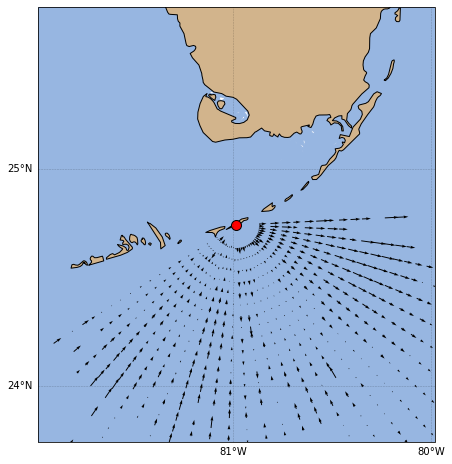

In [9]:
# Intialize an empty subplot using cartopy
fig, ax = plt.subplots(
    figsize=(11, 8),
    subplot_kw=dict(projection=ccrs.Mercator())
)

plt.quiver(tds.lon.data, tds.lat.data, tds.u.data, tds.v.data, transform=ccrs.PlateCarree())
plt.plot(receiver_location[0], receiver_location[1], 'o', markersize=10, markeredgecolor='black', color='red', transform=ccrs.PlateCarree())

map_features(ax)


In [10]:
point_to_find = [-80.5, 24.5] #MARA
# point_to_find = [-73.5, 40.5] #SEAB

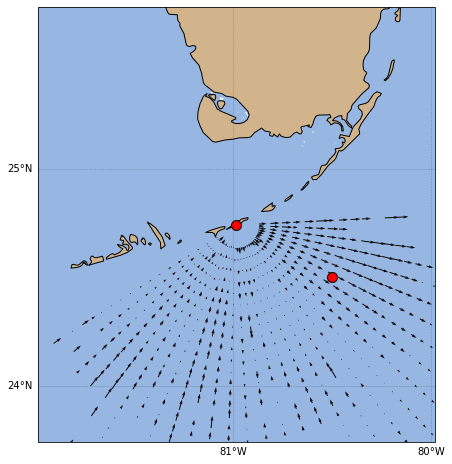

In [11]:
# Intialize an empty subplot using cartopy
fig, ax = plt.subplots(
    figsize=(11, 8),
    subplot_kw=dict(projection=ccrs.Mercator())
)

plt.quiver(tds.lon.data, tds.lat.data, tds.u.data, tds.v.data, transform=ccrs.PlateCarree())
plt.plot(receiver_location[0], receiver_location[1], 'o', markersize=10, markeredgecolor='black', color='red', transform=ccrs.PlateCarree())
plt.plot(point_to_find[0], point_to_find[1], 'o', markersize=10, markeredgecolor='black', color='red', transform=ccrs.PlateCarree())

map_features(ax)

In [12]:
import pyproj

geodesic = pyproj.Geod(ellps='WGS84') #define the coordinate system. WGS84 is the standard used by GPS.

# Inverse transformation
# Determine forward and back azimuths, plus distances between initial points and terminus points.
_, back_azimuth, distance = geodesic.inv(receiver_location[0], receiver_location[1], point_to_find[0], point_to_find[1])

print(f'Bearing (CCWE): {back_azimuth} degrees, Range: {distance} meters') # degrees, meters

Bearing (CCWE): -61.37365057568459 degrees, Range: 55698.02209788037 meters


In [13]:
if back_azimuth < 0:
    back_azimuth = back_azimuth + 180
    
distance = distance/1000 #convert from meters to kilometers

In [14]:
print(f'Bearing (CWN): {back_azimuth} degrees, Range: {distance} kilometers') # degrees, meters

Bearing (CWN): 118.6263494243154 degrees, Range: 55.69802209788037 kilometers


In [15]:
# Select nearest neighbor based on bearing and range
tds = ds.sel(bearing=back_azimuth, range=distance, method='nearest')
tds

<xarray.Dataset>
Dimensions:                   (time: 165)
Coordinates:
    range                     float64 58.25
    bearing                   int16 117
  * time                      (time) datetime64[ns] 2019-12-29 ... 2020-01-04...
    lon                       (time) float64 -80.47 -80.47 ... -80.47 -80.47
    lat                       (time) float32 24.5014 24.5014 ... 24.5014 24.5014
Data variables:
    u                         (time) float32 -0.471 -0.471 ... 31.919 43.875
    v                         (time) float32 0.242 0.242 ... -16.414 -22.562
    vector_flag               (time) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    spatial_quality           (time) float32 52.986 52.986 ... 32.137 30.837
    temporal_quality          (time) float32 11.165 21.5 ... 13.515 13.393
    velocity_max              (time) float32 -115.119 -115.119 ... -24.664
    velocity_min              (time) float32 65.793 65.793 ... 83.73 95.688
    spatial_count             (time) float32 14.0 14.0 4.0 13.0 ... 4.0 4.0 10.0
    temporal_count            (time) float32 6.0 6.0 7.0 7.0 ... 7.0 7.0 6.0 6.0
    dist_east_from_origin     (time) float32 51.9002 51.9002 ... 51.9002 51.9002
    dist_north_from_origin    (time) float32 -26.4445 -26.4445 ... -26.4445
    velocity                  (time) float32 -0.53 -0.53 2.499 ... 35.892 49.336
    heading                   (time) float32 29.720001 29.720001 ... 29.720001
    range_cell                (time) float32 10.0 10.0 10.0 ... 10.0 10.0 10.0
    syntax_qc                 (time) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    max_threshold_qc          (time) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    valid_location_qc         (time) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    radial_count_qc           (time) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    spatial_median_filter_qc  (time) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    temporal_gradient_qc      (time) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    operator_flag_qc          (time) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    primary_flag_qc           (time) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
Attributes:
    CTF:                           1.00
    FileType:                      LLUV rdls "RadialMap"
    LLUVSpec:                      1.27  2017 01 13
    UUID:                          5279047B-3C15-4D31-A947-4881664DCD6D
    Manufacturer:                  CODAR Ocean Sensors. SeaSonde
    Site:                          MARA ""
    TimeStamp:                     2019 12 29  00 00 00
    TimeZone:                      "UTC" +0.000 0 "Atlantic/Reykjavik"
    TimeCoverage:                  240.000 Minutes
    Origin:                        24.7401333  -80.9832833
    GreatCircle:                   "WGS84" 6378137.000  298.257223562997
    GeodVersion:                   "CGEO" 1.85  2017 10 05
    LLUVTrustData:                 all  all lluv xyuv rbvd
    RangeStart:                    2
    RangeEnd:                      36
    RangeResolutionKMeters:        5.824900
    RangeCells:                    63
    DopplerCells:                  2048
    DopplerInterpolation:          1
    AntennaBearing:                237.0 True
    ReferenceBearing:              0 True
    AngularResolution:             5 Deg
    SpatialResolution:             5 Deg
    PatternType:                   Measured
    PatternDate:                   2020 03 09  20 59 06
    PatternResolution:             1.0 deg
    PatternUUID:                   9EBAB71E-2A44-4E06-8DDB-F5CAC59E15DA
    TransmitCenterFreqMHz:         4.900000
    TransmitBandwidthKHz:          -25.733913
    TransmitSweepRateHz:           1.000000
    DopplerResolutionHzPerBin:     0.000488281
    FirstOrderMethod:              0  2 36
    BraggSmoothingPoints:          5
    CurrentVelocityLimit:          200.0
    BraggHasSecondOrder:           1
    RadialBraggPeakDropOff:        199.530
    RadialBraggPeakNull:           125.890
    RadialBraggNoiseThreshold:  

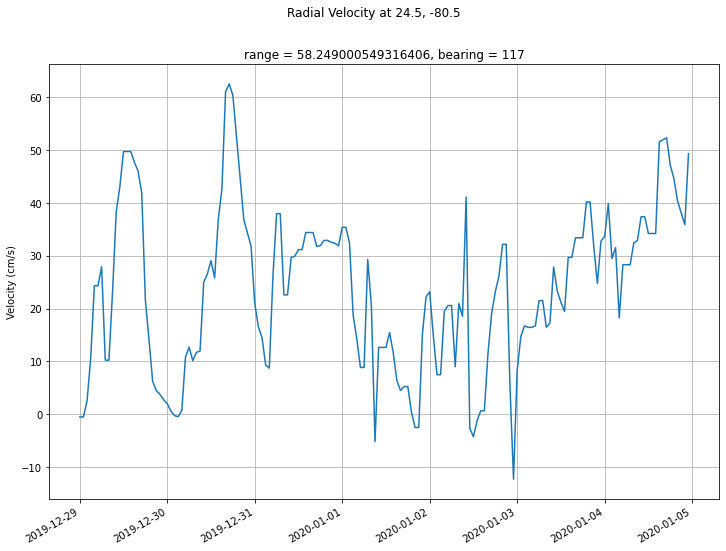

In [16]:
# Plot of single grid point nearest to point selected above
tds.velocity.plot()
plt.grid()
# axes[0].set_ylim([-7, 7])
plt.xlabel('')
plt.ylabel('Velocity (cm/s)')
plt.suptitle(f'Radial Velocity at {point_to_find[1]}, {point_to_find[0]}')
plt.show()

In [17]:
# Use slice selection to get all points between selected bearings and ranges
bearing_slice = [115, 125]
range_slice = [50, 60]

tds = ds.sel(bearing=slice(bearing_slice[0], bearing_slice[1]), range=slice(range_slice[0], range_slice[1]))
tds

<xarray.Dataset>
Dimensions:                   (bearing: 2, range: 2, time: 165)
Coordinates:
  * range                     (range) float64 52.42 58.25
  * bearing                   (bearing) int16 117 122
  * time                      (time) datetime64[ns] 2019-12-29 ... 2020-01-04...
    lon                       (time, range, bearing) float64 -80.52 ... -80.49
    lat                       (time, range, bearing) float32 24.5254 ... 24.4617
Data variables:
    u                         (time, range, bearing) float32 -2.534 ... 43.34
    v                         (time, range, bearing) float32 1.302 ... -27.296
    vector_flag               (time, range, bearing) float32 0.0 0.0 ... 0.0 0.0
    spatial_quality           (time, range, bearing) float32 35.399 ... 32.737
    temporal_quality          (time, range, bearing) float32 12.543 ... 12.531
    velocity_max              (time, range, bearing) float32 -71.748 ... -26.158
    velocity_min              (time, range, bearing) float32 44.867 ... 60.562
    spatial_count             (time, range, bearing) float32 11.0 7.0 ... 4.0
    temporal_count            (time, range, bearing) float32 6.0 6.0 ... 6.0 6.0
    dist_east_from_origin     (time, range, bearing) float32 46.7102 ... 49.398
    dist_north_from_origin    (time, range, bearing) float32 -23.8 ... -30.8673
    velocity                  (time, range, bearing) float32 -2.849 ... 51.219
    heading                   (time, range, bearing) float32 29.720001 ... 30...
    range_cell                (time, range, bearing) float32 9.0 9.0 ... 10.0
    syntax_qc                 (time, range, bearing) float32 1.0 1.0 ... 1.0 1.0
    max_threshold_qc          (time, range, bearing) float32 1.0 1.0 ... 1.0 1.0
    valid_location_qc         (time, range, bearing) float32 1.0 1.0 ... 1.0 1.0
    radial_count_qc           (time, range, bearing) float32 1.0 1.0 ... 1.0 1.0
    spatial_median_filter_qc  (time, range, bearing) float32 1.0 1.0 ... 1.0 1.0
    temporal_gradient_qc      (time, range, bearing) float32 1.0 1.0 ... 1.0 1.0
    operator_flag_qc          (time, range, bearing) float32 1.0 1.0 ... 1.0 1.0
    primary_flag_qc           (time, range, bearing) float32 1.0 1.0 ... 1.0 1.0
Attributes:
    CTF:                           1.00
    FileType:                      LLUV rdls "RadialMap"
    LLUVSpec:                      1.27  2017 01 13
    UUID:                          5279047B-3C15-4D31-A947-4881664DCD6D
    Manufacturer:                  CODAR Ocean Sensors. SeaSonde
    Site:                          MARA ""
    TimeStamp:                     2019 12 29  00 00 00
    TimeZone:                      "UTC" +0.000 0 "Atlantic/Reykjavik"
    TimeCoverage:                  240.000 Minutes
    Origin:                        24.7401333  -80.9832833
    GreatCircle:                   "WGS84" 6378137.000  298.257223562997
    GeodVersion:                   "CGEO" 1.85  2017 10 05
    LLUVTrustData:                 all  all lluv xyuv rbvd
    RangeStart:                    2
    RangeEnd:                      36
    RangeResolutionKMeters:        5.824900
    RangeCells:                    63
    DopplerCells:                  2048
    DopplerInterpolation:          1
    AntennaBearing:                237.0 True
    ReferenceBearing:              0 True
    AngularResolution:             5 Deg
    SpatialResolution:             5 Deg
    PatternType:                   Measured
    PatternDate:                   2020 03 09  20 59 06
    PatternResolution:             1.0 deg
    PatternUUID:                   9EBAB71E-2A44-4E06-8DDB-F5CAC59E15DA
    TransmitCenterFreqMHz:         4.900000
    TransmitBandwidthKHz:          -25.733913
    TransmitSweepRateHz:           1.000000
    DopplerResolutionHzPerBin:     0.000488281
    FirstOrderMethod:              0  2 36
    BraggSmoothingPoints:          5
    CurrentVelocityLimit:          200.0
    BraggHasSecondOrder:           1
    RadialBraggPeakDropOff:        199.530
    Ra

In [ ]:
# Mean of points selected in previous cell
mean = tds.mean(dim=('bearing', 'range'))
mean

<xarray.Dataset>
Dimensions:                   (time: 165)
Coordinates:
  * time                      (time) datetime64[ns] 2019-12-29 ... 2020-01-04...
Data variables:
    u                         (time) float32 -8.641251 -4.7485 ... 42.97125
    v                         (time) float32 5.3525 3.0127501 ... -24.51325
    vector_flag               (time) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    spatial_quality           (time) float32 47.085 48.01275 ... 20.38125
    temporal_quality          (time) float32 11.30175 15.1235 ... 14.480499
    velocity_max              (time) float32 -94.7475 -92.511505 ... 1.1329999
    velocity_min              (time) float32 48.23 49.9115 ... 69.1565 75.88275
    spatial_count             (time) float32 10.0 9.5 5.75 ... 5.25 4.25 5.75
    temporal_count            (time) float32 6.0 6.0 7.0 7.0 ... 7.0 7.0 6.0 6.0
    dist_east_from_origin     (time) float32 48.11665 48.11665 ... 48.11665
    dist_north_from_origin    (time) float32 -27.223074 ... -27.223074
    velocity                  (time) float32 -10.167749 -5.623 ... 49.51825
    heading                   (time) float32 29.970001 29.970001 ... 29.970001
    range_cell                (time) float32 9.5 9.5 9.5 9.5 ... 9.5 9.5 9.5 9.5
    syntax_qc                 (time) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    max_threshold_qc          (time) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    valid_location_qc         (time) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    radial_count_qc           (time) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    spatial_median_filter_qc  (time) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    temporal_gradient_qc      (time) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    operator_flag_qc          (time) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    primary_flag_qc           (time) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0

In [ ]:
# Velocity Plot of mean
mean.velocity.plot()
plt.grid()
plt.xlabel('')
plt.ylabel('Velocity (cm/s)')
plt.suptitle(f'Average Radial Velocity\n All points between/including a bearing of {bearing_slice[0]} to {bearing_slice[1]} degrees and a range of {range_slice[0]} to {range_slice[1]} km ')
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=2)
plt.suptitle(f'Average Radial Velocity\n All points between/including a bearing of {bearing_slice[0]} to {bearing_slice[1]} degrees and a range of {range_slice[0]} to {range_slice[1]} km ')

mean.u.plot(ax=axes[0])
axes[0].grid()
# axes[0].set_ylim([-7, 7])
axes[0].set_xlabel('')
axes[0].set_ylabel('u (cm/s)')

mean.v.plot(ax=axes[1])
axes[1].grid()
axes[1].set_ylim([-80, 80])
axes[1].set_ylabel('v (cm/s)')
axes[1].set_xlabel('')

plt.tight_layout()
plt.show()
# plt.savefig('/Users/mikesmith/Desktop/isaias-mean.png', dpi=300, bbox_inches='tight', pad_inches=0.1)


In [ ]:
# Single bearing bin, multiple ranges
azimuth = 0
bearing = tds.isel(bearing=azimuth)

fig, axes = plt.subplots(nrows=2, sharex=True)
bearing.u.plot.line(x='time', ax=axes[0], )
axes[0].grid()
# axes[0].set_ylim([-7, 7])
axes[0].set_ylabel('u (cm/s)')
axes[0].set_xlabel('')

bearing.v.plot.line(x='time', ax=axes[1],)
axes[1].grid()
axes[1].set_ylim([-80, 80])
axes[1].set_ylabel('v (cm/s)')
axes[1].set_xlabel('')
plt.suptitle(f'Radial Velocity\n All points at a bearing of {azimuth} degrees and ranges including {bearing.range.data} km ')

plt.tight_layout()
plt.show()

